# Flight Fare Prediction - End to End deployment

## Importing Essential Libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import os
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

- As the data is in the form of excel, so here we can use read_excel() from pandas 
- After loading the data, next steps will be based on analysis of the data
     - Exploratory Data Analysis (finding hidden information and finding some basic analysis.
     - Findind null values from the dataset and will fill the missing data with mean, median and mode.
- Statistical Analysis of the data

In [56]:
# loading the training data
data_train = pd.read_excel("D:\Popeye\Flight Fare Prediction\Data_Train.xlsx")

Let's check first 5, last 5 and random 5 samples from the training dataset

In [57]:
data_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [58]:
data_train.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [59]:
data_train.sample()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2338,IndiGo,12/06/2019,Delhi,Cochin,DEL → BOM → COK,16:00,01:30 13 Jun,9h 30m,1 stop,No info,6316


### Basic exploratory data analysis from above function

This function will help us to find basic eda of test data

In [60]:
def basic_eda(data):
    print("------BASIC EDA OF THE DATA------")
    print("\nShape of the data: ")
    print(data.shape)
    print("\n-------------------")
    print("\nSize of the data: ")
    print(data.size)
    print("\n-------------------")
    print("\nDatatypes of the object: ")
    print(data.dtypes)
    print("\n-------------------")
    print("\nColumns of the data: ")
    print(data.columns)
    print("\n-------------------")
    print("\nInformation of the data: ")
    print(data.info())
    

# eda on training data
basic_eda(data_train)

------BASIC EDA OF THE DATA------

Shape of the data: 
(10683, 11)

-------------------

Size of the data: 
117513

-------------------

Datatypes of the object: 
Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

-------------------

Columns of the data: 
Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

-------------------

Information of the data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_

### Finding missing values from the data

In [61]:
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

**Route** and **Total Stops** has single missing value each. So data doesn't have more null values. So let's drop the null values

In [62]:
data_train.dropna(inplace=True)

In [63]:
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Converting data types

From description we can see that **Date_of_Journey** is a object data type,\ Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

In [64]:
data_train["Journey_day"] = pd.to_datetime(data_train.Date_of_Journey, format="%d/%m/%Y").dt.day

In [65]:
data_train["Journey_month"] = pd.to_datetime(data_train["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [66]:
# We have converted Date_of_Journey column into integers. Droping that column
data_train.drop(["Date_of_Journey"], axis=1, inplace=True)

In [67]:
data_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


Similar to Date_of_Journey we can extract values from Dep_Time

In [68]:
data_train["Dep_hour"] = pd.to_datetime(data_train["Dep_Time"]).dt.hour
data_train["Dep_min"] = pd.to_datetime(data_train["Dep_Time"]).dt.minute

# We can drop Dep_time 
data_train.drop(["Dep_Time"], axis=1, inplace=True)

In [69]:
data_train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


Arrival time is when plane pulls up to the gate

We can extract values from Arrival Time


In [70]:
data_train["Arrival_hour"] = pd.to_datetime(data_train.Arrival_Time).dt.hour
data_train["Arrival_min"] = pd.to_datetime(data_train.Arrival_Time).dt.minute

# We can drop Arrival Time
data_train.drop(["Arrival_Time"], axis=1, inplace=True)

data_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [71]:
# Time taken by plane to reach the destination is called Duration
# It is the difference between Departute Time and Arrival time

# Assigning and converting Duration column into list
duration = list(data_train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 

In [72]:
# Adding duration_hours and duration_mins list to data_train dataframe

data_train["Duration_Hours"] = duration_hours
data_train["Duration_Mins"] = duration_mins

# Droping the "Duration" Colum
data_train.drop(["Duration"], axis=1, inplace=True)

data_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


### Analyzing the data column wise

### Airline Column

In [73]:
data_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

### Top running airlines 
1. Jet Airways
2. IndiGo
3. Air India

There is no point to point to look factors like Date, stop, arrival_times.

### Sources

In [74]:
data_train['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

Source of the most flights are from **Delhi**, **Kolkata** and **Banglore** 

### Destination

In [75]:
data_train['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

Destined flights are **Cochin**, **Banglore** and **Delhi**

### Route

In [76]:
data_train['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

### Most of the the route followed by the flights are 
1. DEL → BOM → COK
2. BLR → DEL
3. CCU → BOM → BLR

### Duration, Time and Month

In [77]:
data_train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_Hours',
       'Duration_Mins'],
      dtype='object')

Most Common Journey Dateand Month

In [78]:
data_train["Journey_day"].value_counts()

9     1406
6     1287
27    1130
21    1111
1     1075
24    1052
15     984
12     957
3      848
18     832
Name: Journey_day, dtype: int64

In [79]:
data_train["Journey_month"].value_counts()

5    3465
6    3414
3    2724
4    1079
Name: Journey_month, dtype: int64

Above numbers are describing the top commonn **Day** and **Months** of the journeys. So, in dates 9, 6 and 27 that are common in most of the journeys but dates are not much importnat where **Months** are too important factors for journeys.

So, Months are 5-6-3-4 that means May(5)-June(6)-March(3)-April(4). Indian Airlines and journeys are busy in these months because of in India this months are very ideal for travellers because of **Summer Holidays** of students and other factors may be **Business Purpose, IPL(Cricket League in India, commonly held between April-June) and etc.**

**May**, **June** and **March** are the top most journey months

## Data Preprocessing and Visualization

### Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,

**Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case
**Ordinal data** --> data are in order --> **LabelEncoder** is used in this case

## Visualizing and encoding **Airlines** column

Prices of each Airlines

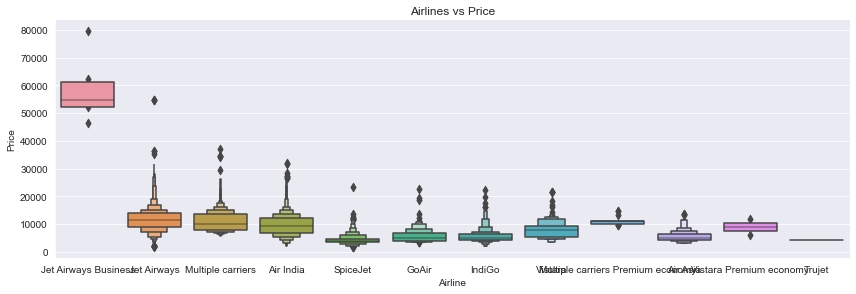

<Figure size 2160x1800 with 0 Axes>

In [80]:
sns.catplot(y = "Price", x = "Airline", data = data_train.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.title('Airlines vs Price')
plt.figure(figsize=(30,25))
plt.show()

Some Airlines are long in lenght but our intension here to just check the price range of all Airlines. From above image we can clearly see that

**Jet Airways Business** having very high price (Is it business class plane?May be yes!), Runner up is again **Jet Airways** but other airlines expcept **Jet Airways Business** having nearly same range especially medin range of prices are same.

### Encoding the Airline column

It is **Nominal** categorical data as we will perform OneHotEncoding

In [81]:
Airline = data_train[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


## Soruce Column

Let's check the prices from different sources

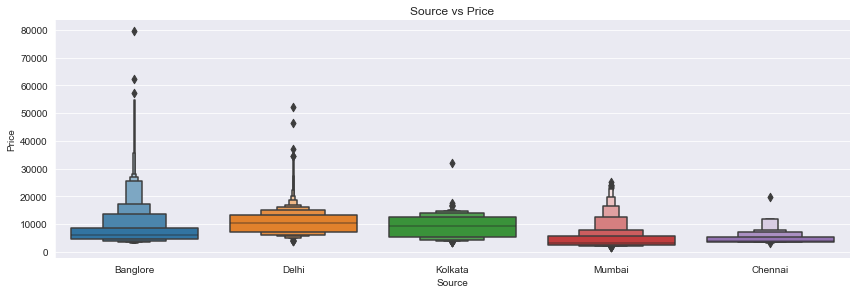

<Figure size 2160x1800 with 0 Axes>

In [82]:
sns.catplot(y = "Price", x = "Source", data = data_train.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.title('Source vs Price')
plt.figure(figsize=(30,25))
plt.show()

**Banglore** is the costly source to travel also from above graph we can clearly see that **Delhi** and **Kolkata** has samiliar median price.

### Encoding the Source

In [83]:
# It is a Nominal Data
Source = data_train["Source"]

Source = pd.get_dummies(Source, drop_first = True)

Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


#### Encoding of Destination is same but no need to caluclate the price

In [84]:
data_train["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [85]:
# It is Nominal data
Destination = data_train[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first=True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


##### For preprocessing the data for Machine Learning Model we need to drop some unecceassary data

In [86]:
data_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


Lets check the importance of **Additional_info**

In [87]:
data_train['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

**Additional_Info** column is not providing us important information

In [88]:
data_train['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

Even **Route** is not that important for us, sp lets drop these columns.

In [89]:
data_train.drop(["Route","Additional_Info"], axis=1, inplace=True)

data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


**Total Stops** are the only column that haven't seen yet

In [90]:
data_train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In above case of **Ordinal** Categorical type we perform LabelEncoder

We can assign values with corresponding keys

In [91]:
data_train.replace({"non-stop": 0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4}, inplace=True)

data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


### Concatenate dataframe --> train_data + Airline + Source + Destination

In [92]:
data_train = pd.concat([data_train, Airline, Source, Destination], axis=1)
data_train.head()


,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,...,Airline_Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [93]:
# Dropping columns coz they are now in encoded version

data_train.drop(["Airline","Source", "Destination"], axis=1, inplace=True)

In [94]:
# Saving this dataset

data_train.to_csv('processed_trainData.csv')

# Test Data

In [95]:
data_test = pd.read_excel('Test_set.xlsx')

In [96]:
data_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


## Preprocessing on the test data

In [97]:
# already created the fucntion
basic_eda(data_test)

------BASIC EDA OF THE DATA------

Shape of the data: 
(2671, 10)

-------------------

Size of the data: 
26710

-------------------

Datatypes of the object: 
Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

-------------------

Columns of the data: 
Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

-------------------

Information of the data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2  

### Null values

In [98]:
print("Null values: ")
print(data_test.isnull().sum())
print("\nAfter droping the test data: ")
print(data_test.isnull().sum())

Null values: 
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

After droping the test data: 
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


## EDA and Encoding of Categorical data

In [99]:
# Date_of_Journey
data_test["Journey_day"] = pd.to_datetime(data_test.Date_of_Journey, format="%d/%m/%Y").dt.day
data_test["Journey_month"] = pd.to_datetime(data_test["Date_of_Journey"], format = "%d/%m/%Y").dt.month
data_test.drop(["Date_of_Journey"], axis=1, inplace=True)

In [100]:
# Dep_time
data_test["Dep_hour"] = pd.to_datetime(data_test["Dep_Time"]).dt.hour
data_test["Dep_min"] = pd.to_datetime(data_test["Dep_Time"]).dt.minute
data_test.drop(["Dep_Time"], axis = 1, inplace = True)

In [101]:
data_test["Arrival_hour"] = pd.to_datetime(data_test.Arrival_Time).dt.hour
data_test["Arrival_min"] = pd.to_datetime(data_test.Arrival_Time).dt.minute
data_test.drop(["Arrival_Time"], axis = 1, inplace = True)

In [102]:
# Duration

duration = list(data_test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
data_test["Duration_hours"] = duration_hours
data_test["Duration_mins"] = duration_mins
data_test.drop(["Duration"], axis = 1, inplace = True)

In [103]:
# Categorical

print("Airline")
print("-"*75)
print(data_test["Airline"].value_counts())
Airline = pd.get_dummies(data_test["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(data_test["Source"].value_counts())
Source = pd.get_dummies(data_test["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(data_test["Destination"].value_counts())
Destination = pd.get_dummies(data_test["Destination"], drop_first = True)

Airline
---------------------------------------------------------------------------
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

Source
---------------------------------------------------------------------------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

Destination
---------------------------------------------------------------------------
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


In [104]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
data_test.drop(["Route", "Additional_Info"], axis = 1, inplace = True)


In [105]:
data_test.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,1 stop,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1 stop,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1 stop,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1 stop,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,non-stop,24,6,23,55,2,45,2,50


In [106]:
# Replacing the Total_Stops
data_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [107]:
# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([data_test, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


### Shape of training and testing dataset


In [108]:
print("Shape of the training data: ")
print(data_train.shape)
print("Shape of the testing data: ")
print(data_test.shape)

Shape of the training data: 
(10682, 30)
Shape of the testing data: 
(2671, 28)


In [109]:
# Saving the processed_test data

data_test.to_csv("processed_testData.csv")

### Done with analysis and preprocessing of the data in this notebook.

Feature extraction, Hyperparameter Optimization and Model training are available in **modelTraining.ipynb**